In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

from skimage.io import imread
from skimage.transform import rescale,resize

from skimage.filters import gaussian, sobel
from scipy.signal import convolve

import tensorflow as tf
from tensorflow.keras.applications.resnet50 import ResNet50,preprocess_input,decode_predictions

In [22]:
image = imread("data/sand-cat/sd (72).jpg")

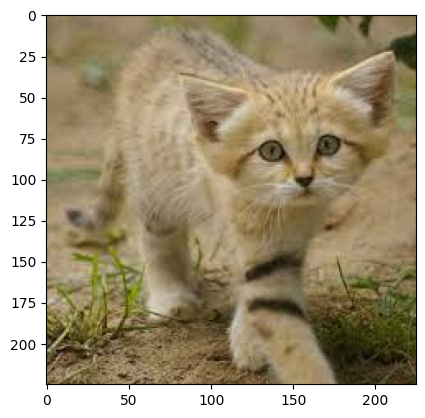

In [23]:
plt.imshow(image)
plt.show()

In [10]:
model = ResNet50()



102967424/102967424 [==============================] - 33s 0us/step


In [11]:
model.summary()

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 230, 230, 3)          0         ['input_1[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 112, 112, 64)         9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 112, 112, 64)         256       ['conv1_conv[0][0]']          
 on)                                                                                       

In [64]:
image.shape

TensorShape([224, 224, 3])

In [65]:
image = preprocess_input(image) 


In [66]:
image =tf.image.resize(image,(224,224))

In [67]:
predictions =model.predict(tf.expand_dims(image,0))

1/1 [==============================] - 0s 184ms/step


In [68]:
decode_predictions(predictions)

[[('n02124075', 'Egyptian_cat', 0.21808068),
  ('n04589890', 'window_screen', 0.095975675),
  ('n03584829', 'iron', 0.07836199),
  ('n03804744', 'nail', 0.061860215),
  ('n02127052', 'lynx', 0.06100463)]]

In [69]:
predictions = predictions[0]

In [61]:
predictions = np.array(predictions)

ValueError: `decode_predictions` expects a batch of predictions (i.e. a 2D array of shape (samples, 1000)). Found array with shape: (1000,)

In [ ]:
predictions.sum()

In [48]:
top5_indices = predictions.argsort()[-5:][::-1]

top5_scores = predictions[top5_indices]
top5_scores
top5_indices

array([287, 285, 282, 281, 289], dtype=int64)

In [44]:
predictions.argmax()

287

In [19]:
tf.expand_dims(image,0).shape

In [21]:
image

TensorShape([1, 225, 225, 3])

35363/35363 [==============================] - 0s 0us/step


[[('n02127052', 'lynx', 0.7261773),
  ('n02124075', 'Egyptian_cat', 0.20264205),
  ('n02123159', 'tiger_cat', 0.02805116),
  ('n02123045', 'tabby', 0.019856432),
  ('n02128757', 'snow_leopard', 0.008967485)]]

0.9999996